# DBSCAN with Scikit-learn

## Set up and generate data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

import numpy as np
import pandas as pd

from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [2]:
X, label = make_moons(n_samples=200, noise=0.1, random_state=19)
print(X[:5,])

[[ 0.28171457  0.91044406]
 [ 0.8389241  -0.53005338]
 [ 0.40915474  0.80944352]
 [-0.98415213  0.13142155]
 [ 1.15919021  0.4910425 ]]


## Train the model

In [3]:
# model = DBSCAN?
model = DBSCAN(eps=0.26, min_samples=10).fit(X)
print(model)

DBSCAN(eps=0.26, min_samples=10)


## Access the cluster labels and core points

In [4]:
model.labels_

array([ 0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1, -1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,
        0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0])

In [5]:
model.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  27,
        28,  29,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  49,  50,  51,  52,  53,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  75,  76,  77,  78,  79,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 133, 134, 136, 137, 138, 139, 140, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 175, 177, 178, 179, 180, 182, 183, 184, 185, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 19

## Plot the clusters in feature space

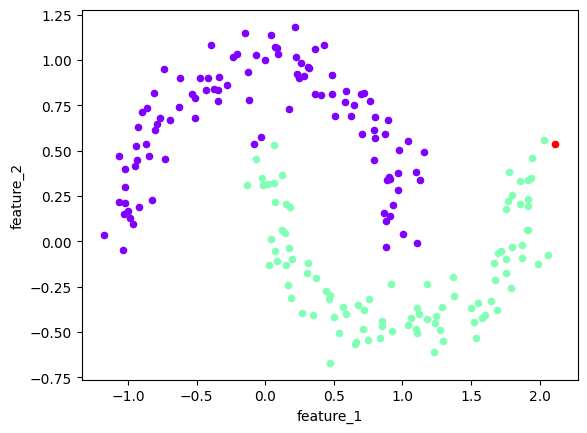

In [6]:
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=model.labels_))


cluster_name = set(model.labels_)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', color=colors[key].reshape(1,-1))

pyplot.show()

-----